# Pruebas 
## Octubre 2018



En este trabajo se analizarán los resultados obtenidos al variar los parámetros de acople de un sistema de dos funciones que se encuentran correlacionadas, con la finalidad de estudiar el efecto de estas variaciones sobre la información mutua y la transferencia de entropía.

Para esto se obtendrán series de tiempo a partir de dos mapas como el logístico y el triangular (Skew Tent Maps), las cuales serán llamadas $f$ y $g$. 

Siendo $f$ el mapa logístico:

$$f(x_{i})=r x_{i}(1-x_i)$$

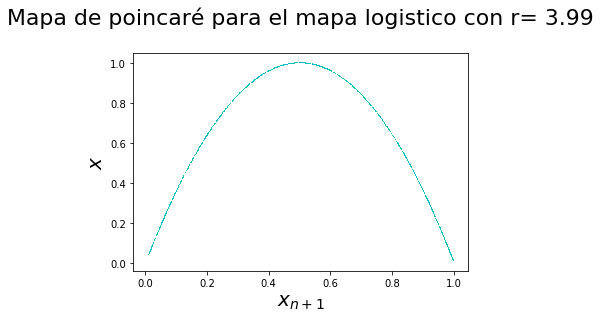

In [45]:
import numpy as np
from pylab import *

def f(x, r):
    return r*x*(1-x)

N = 1500 
r = 3.99

i=np.random.random_sample()
x=np.zeros((N+1,))
x[0]=i
b=np.zeros((N+1,))
 
for n in range(0,N):
    x[n+1]=f(x[n],r)
    
for i in range(len(x)):    
    b[i]=f(x[i], r)
    
xlabel('$x_{n+1}$',fontsize=20)
ylabel('$x$',fontsize=20)
title('Mapa de poincaré para el mapa logistico con r= ' + str(r) + '\n',fontsize=22)
plot(x,b,',c',linewidth=0.1)
show()

EL mapa logístico puede interpretarse como un modelo de población en un sistema en el que los recursos son
limitados.  El crecimiento exponencial dado por la parte $f(x_{i}) = r x_i$ resulta limitado por la no linealidad 
$-r x_{i}^{2}$ , que representa la competencia entre los individuos por los recursos compartidos.


$x_i$  debe estar dentro de $0\leq x \leq 1$ siendo 1 el máximo posible de la población y 0 siendo extinción. $r$ representa la fertilidad de la población.

El valor de $r$ dentro del mapa Logístico
debe cumplir el parámetro $0 \leq r\leq 4$ para garantizar que la salida de la función se mantenga dentro de $[0,1]$.

Según el valor que se le adjudique a $r$, se observán diferentes comportamientos en la función.

En todas las pruebas realizadas se utilizó $r=3.99$, ya que a partir de $r=3.90$ la función tiene un comportamiento caótico.



Y siendo $g$ el mapa triangular:

$$g(x_{i})=\left \{  {{x_{i} \ \over a}  \ \ \ \  \mbox {si } 0 \leq x_{i}  \leq a} \atop {{{r-x_{i}} \over {1-a}}      \ \ \mbox{si } a< x_{i} \leq 1 } \right . $$

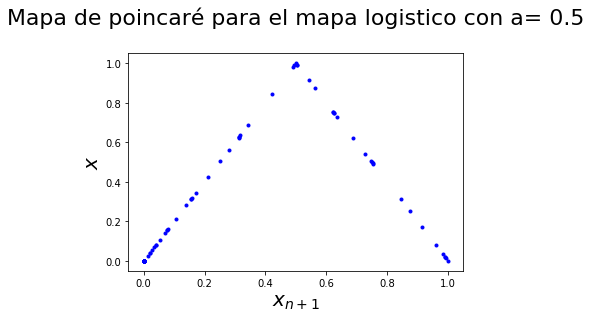

In [44]:
import numpy as np
from pylab import *

def g(x,a):
    if 0<=x and x<=a:
        return (x/a)
    elif a<x and x<=1:
        return ((1-x)/(1-a))
    
N = 1500 
a = 0.5

i=np.random.random_sample()
x=np.zeros((N+1,))
x[0]=i
b=np.zeros((N+1,))
 
for n in range(0,N):
    x[n+1]=g(x[n],a)
    
for i in range(len(x)):    
    b[i]=g(x[i], a)
    
xlabel('$x_{n+1}$',fontsize=20)
ylabel('$x$',fontsize=20)
title('Mapa de poincaré para el mapa logistico con a= ' + str(a) + '\n',fontsize=22)
plot(x,b,'.b',linewidth=0.1)
show()

Cabe destacar que se utilizarán dos tipos de acoples diferentes, llamaremos el acople 1 al presentado por M. Hasler y Y-L. Maistrenko. en el trabajo titulado "An Introduction to the Synchronization of Chaotic Systems: Coupled Skew Tent Maps. IEEE Transactions on Circuits and Systems : Fundamental Theory and Applications"

 $$x(t+1)=f( \ x(t) \ +\mu  \ ( \ y(t) \ - \ x(t) \ ) \ )$$
$$y(t+1)=g( \ y(t) \ + \ \epsilon \  ( \ x(t) \ - \ y(t) \ ) \ )$$

y llamaremos acople 2 al planteado por Jalan, S. y Amritkar en un trabajo titulado "Self-organized and driven phase synchronization in coupled maps". 

$$x(t+1)=(1-\epsilon) \ f \ ( \ x(t)) \ + \ \epsilon \ f(y(t) \ )$$ 
$$y(t+1)=(1-\mu) \ g \ ( \ y(t)) \ + \ \mu \ g(x(t) \  )$$

A partir de las series temporales luego de un transiente de 500 puntos se tomaron $N$ datos de ambos mapas los cuales eran valores continuos. Para poder calcular la información mutua y la transferencia de entropía a partir de estas series se construyeron versiones simbólicas de estas series temporales utilizando dos criterios diferentes.

La primera forma para hallar esta representación simbólica fue mediante la introducción de particiones, esto es, una  una división del espacio de estados $S$ (conjunto de todos los estados accesibles del sistema) en $M$ conjuntos ($s_1,s_2,s_3,...,s_M$).

Una vez efectuada la partición, los símbolos de la evolucón del sistema

$$x_1,x_2,x_3,...,x_N$$

Pueden ser representados por una secuencia

$$  \sigma_1,\sigma_2,...,\sigma_N \ \  con  \ \ \sigma_i \in S$$

Esto quiere decir que a cada valor de la serie temporal $x_i$ se le asignará un valor según su valor en la nueva representación. Aquí, los símbolos son asignados de acuerdo con:
$$x_i \to s_i \ \ si \ \  x_i \in S_i$$.

Por ejemplo para 4 particiones se obtiene lo siguiente:
 $$S(x)=\left\{ \begin{array} {lcc} {{s_1=0} \ \ \mbox {para} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ x \leq 0.25} \\ {{s_2=1} \ \  \mbox{para} \ \ \ \ \ \ 0.25< x \leq 0.5 }  \\ {{s_3=2} \ \ \mbox{para} \ \ \ \ \ \ \ \ 0.5< x \leq 0.75 }  \\ {{s_4=3} \ \ \mbox{para} \ \ \ \ \ \ 0.75< x \leq 1 } \end{array} \right . $$

El segundo método que se introdujo para hallar la representación simbólica de las series temporales fue el de los bins, para esto, se debe realizar una partición binaria a la serie temporal. Esto puede ser expresado con la función de Heaviside:

$$\Theta(x)=\left\{ \begin{array} {lcc} {{s_1=0} \ \ \mbox {para} \ \ \ \  \ \ \ \  \ \ \ \ \ \ x \leq 0.5} \\ {{s_2=1} \ \ \mbox{para} \ \ \ \ 0.5< x \leq 1 }   \end{array} \right .$$

A partir de estas nuevas series binarias se fue variando el numero de compartimientos y hallando para cada retícula el valor real de esta. Por ejemplo, si luego de la partición se obtuvo la siguiente serie binaria:

$$|0|0|0|1|1|0|1|1|0|1|$$
 y tomamos las retículas de 5 dígitos obtenemos:
 $$|0|0|0|1|1| \ \ y \ \ |0|1|1|0|1|$$
 estos numeros binarios corresponderán en la nueva serie temporal a los números
 $$3 \ \ y \ \ 13$$.

Tomando en cuenta que para realizar la conversión de binario a decimal, debe realizarse lo siguiente:
1.  Del derecho del número en binario se multiplica cada dígito por 2 elevado a la potencia consecutiva (comenzando por la potencia 0, $2^0$).
2. Después de realizar cada una de las multiplicaciones, se súman todos los valores y el número resultante será el equivalente al sistema decimal.

Con estas nuevas series temporales se procedió a calcular la información mutua y la transferencia de entropía variando los valores de particiones y de los bins.